While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, you'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

Instructions
- Read the data set into a dataframe.
- Explore the data by entering star_wars.head(10). Look for any strange values in the columns and rows.
- Review the column names with star_wars.columns.
- Remove any rows where RespondentID is NaN. You can use the pandas.notnull() function to accomplish this. Only select rows where the RespondentID column is not null.
- When you're finished, star_wars should only consist of rows where RespondentID is not NaN.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
df = pd.read_csv('StarWars.csv', encoding="ISO-8859-1")
df.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [30]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [31]:
df = df[df['RespondentID'].notnull()]

Take a look at the next two columns, which are:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We can use the pandas.Series.map() method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

series = ["Yes", "No", NaN, "Yes"]

We can use a dictionary to define a mapping from each value in series to a new value:

yes_no = {
    "Yes": True,
    "No": False
}

Then, we can call the map() function to perform the mapping:

series = series.map(yes_no)
series will end up looking like this:

[True, False, NaN, True]

Instructions
- Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.
- Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.
- When you're finished, both columns should only contain the values True, False, and NaN.

In [32]:
yes_no = {"Yes": True, "No": False}

df['Have you seen any of the 6 films in the Star Wars franchise?'] = df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [33]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

For example, imagine we had this column series:

["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
We could convert the values using this mapping dictionary:

{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False
}

After calling the map() method on a series, the column should only contain the values True and False.

Next, we'll need to rename the columns to better reflect what they represent. We can use the pandas.DataFrame.rename() method on dataframes to accomplish this.

The df.rename() method works a lot like map(). We pass it a dictionary that maps the current column names to new ones:

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})

The pandas.DataFrame.rename() method will only rename the columns we specify in the dictionary, and won't change the names of other columns. The code above will rename the Which of the following Star Wars films have you seen? Please select all that apply. column to seen_1.

Instructions
- Convert each column above so that it only contains the values True and False.
- You can select the column names more quickly by entering star_wars.columns[3:9], rather than typing them out.
- Be very careful with spacing when constructing your mapping dictionary! In the cells, Star Wars: Episode I The Phantom Menace has two spaces between the end of Episode I and the start of The Phantom, but this is not the case in Star Wars: Episode VI Return of the Jedi. Check the values in the cells carefully to make sure you use the appropriate spacing.
- Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.
- When you're finished, the columns should have intuitive names, along with True and False values that indicate whether the respondent saw each of the six Star Wars movies.

In [43]:
cols = df.columns[3:9]
films = df[cols].iloc[4].values

i = 0
for col in cols:
    df[col] = df[col].map({films[i]: True, np.nan: False})
    i += 1

i = 1
for col in cols:
    df.rename(columns={col: 'Seen SW' + str(i)}, inplace=True)
    i += 1

In [44]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen SW1,Seen SW2,Seen SW3,Seen SW4,Seen SW5,Seen SW6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace

Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the pandas.DataFrame.astype() method on dataframes. In this case, we can use code that looks like this:

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

The code above will convert column 9 up to but not including column 15 to the float data type.

Instructions
- Convert each of the columns above to a float type.
- You can select all of the column names with star_wars.columns[9:15], rather than typing each one in.
- Give each column a more descriptive name. We suggest ranking_1, ranking_2, and so on.
- You can use the df.rename() method from the last screen to accomplish this.

In [45]:
df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)

In [66]:
cols = df.columns[9:15]

for i in range(len(cols)):
    df.rename(columns={cols[i]: 'Rank SW' + str(i + 1)}, inplace=True)

In [67]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen SW1,Seen SW2,Seen SW3,Seen SW4,Seen SW5,Seen SW6,Rank SW1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

Instructions

- Use the pandas.DataFrame.mean() method to compute the mean of each of the ranking columns from the last screen.
- Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
- Make sure to run %matplotlib inline beforehand to show your plots in the notebook.
- Write up a summary of what you've done so far in a Markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
- Remember that a lower ranking is better!

In [70]:
cols = df.columns[9:15]
ranks = df[cols].mean()

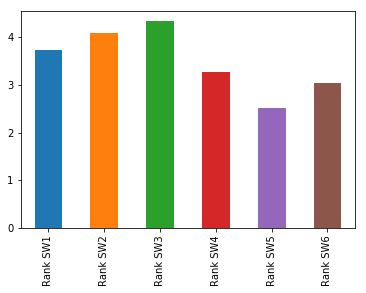

In [72]:
ranks.plot.bar()

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

Instructions

- Use the df.sum() method to compute the sum of each of the seen columns.
- Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
- Write up your thoughts on why the results look the way they do in a Markdown cell. Also discuss how the results correlate with the rankings.

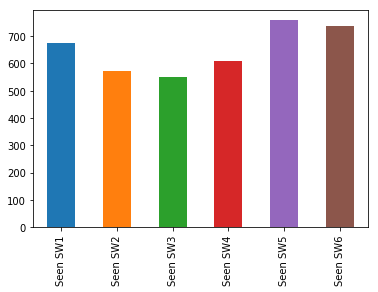

In [77]:
cols = df.columns[3:9]
seen = df[cols].sum()
seen.plot.bar()

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column like this:

males = star_wars[star_wars["Gender"] == "Male"]

females = star_wars[star_wars["Gender"] == "Female"]

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

Instructions
- Split the data into two groups based on one of the binary columns above.
- Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.
- If you see any interesting patterns, write about them in a Markdown cell.

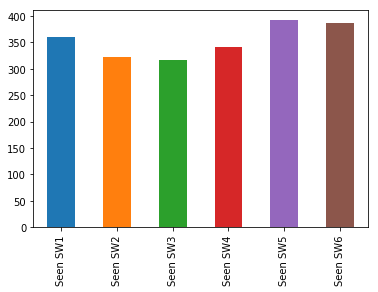

In [80]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

cols = df.columns[3:9]
seen_males = males[cols].sum()
seen_females = females[cols].sum()
seen_males.plot.bar()

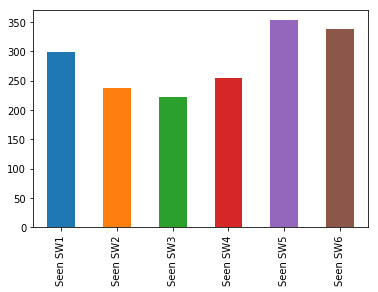

In [81]:
seen_females.plot.bar()

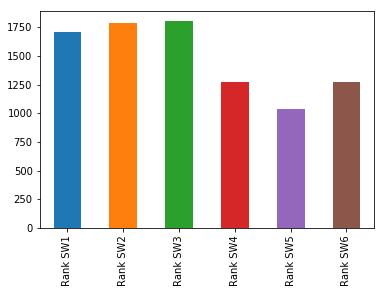

In [83]:
cols = df.columns[9:15]
rank_males = males[cols].sum()
rank_females = females[cols].sum()
rank_males.plot.bar()

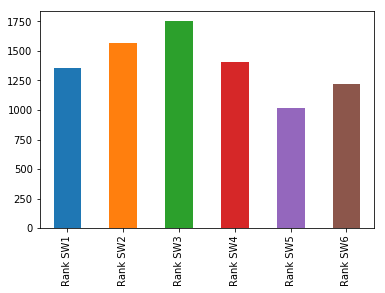

In [84]:
rank_females.plot.bar()

That's it for the guided steps! We highly recommend exploring the data further on your own.

Here are some potential next steps:

- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

We highly recommend creating a GitHub repository and placing this project there. It will help other people see your work, including employers. As you start to put multiple projects on GitHub, you'll have the beginnings of a strong portfolio.

You're welcome to keep working on the project here, but we highly recommend downloading it to your computer using the download icon above and working on it there.